# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

In [10]:
from google.colab import drive as drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Importation des librairies necessaires au travail

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [12]:
# données
data = np.genfromtxt("/content/gdrive/My Drive/TP/TP2/data.csv", delimiter=',',dtype=np.int8)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [13]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1)) 
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

In [14]:
print("X.shape = ",X.shape) #(O0 X0)
print("y.shape = ",y.shape) #y

X.shape =  (97, 2)
y.shape =  (97,)


In [15]:
print(X[:3])

[[1. 6.]
 [1. 5.]
 [1. 8.]]


In [16]:
print(y[:3])

[17  9 13]


Text(0, 0.5, 'Bénéfice x1000')

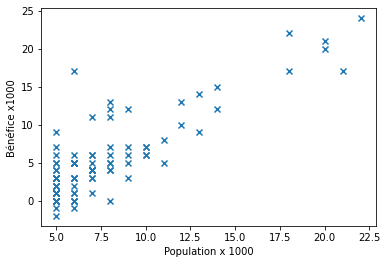

In [6]:
è# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [17]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    number_examples = X.shape[0] #or len(y)
    number_fetures= X.shape[1]
    somme = 0    

    for i in range(number_examples):
      #à chaque fois on calcule la valeur de la fonction d'hypothèse pour la valeur Xi 
      hypothesis_i=0
      for j in range(number_fetures):
        hypothesis_i += theta[j]*X[i][j]
      diff=hypothesis_i - y[i]
      somme += np.power(diff, 2)

      
    cost =  (1/(2*number_examples)) * somme

    return cost

In [18]:
def computeCost(X, y, theta):
  #hypothesis = (np.transpose(X) * theta)[1]
  hypothesis = X.dot(theta)[:,0]
  diff = np.subtract(hypothesis, y)
  number_examples = len(y)

  cost = 1 / (2 * number_examples) * np.sum(np.square(diff))  
  #cost2 = 1/(2*number_examples)*np.sum(np.power(np.subtract(np.dot(X, theta)[:,0], y), 2))
  return cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [19]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m=len(y)     
    for iter in range(iterations):
      hypothesis = np.dot(X,theta)[:,0]
      diff = np.subtract(hypothesis, y)
      for i in range(len(theta)):
        diff_i= np.array(X[:,i])*(np.array(diff))
        theta[i] = theta[i]  - (1 / m) * alpha *np.sum(diff_i)
      
    return theta

In [20]:
#cette fonction calcule theta + donne l'historique de la fonction cout et des valeurs de theta
def gradientDescent_history(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    m=len(y)
    theta_history = np.zeros((iterations, 2))
    cost_history = np.zeros(iterations)
     
    for iter in range(iterations):
      hypothesis = np.dot(X,theta)[:,0]
      diff = np.subtract(hypothesis, y)
      for i in range(len(theta)):
        diff_i= np.array(X[:,i])*(np.array(diff))
        theta[i] = theta[i]  - (1 / m) * alpha *np.sum(diff_i)
      
      theta_history[iter,:] = theta.T
      cost_history[iter] =  computeCost(X, y, theta)

    return theta, theta_history, cost_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [22]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

Calculer le cout initial

In [ ]:
%%time
"""on remarque que les deux fonction computeCost et computeCostNonVect donnent la meme valeur au vecteur theta 
mais la première est plus rapide """
initialCost=computeCost(X, y, theta)
print(initialCost)

4.367471994015457
CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 2.01 ms


In [ ]:
%%time
initialCost=computeCostNonVect(X, y, theta)
print(initialCost)

[4.26995732]
CPU times: user 3.78 ms, sys: 0 ns, total: 3.78 ms
Wall time: 3.71 ms


Appel des la fonction de calcul du gradient

In [27]:
# paramètres
theta = np.zeros((2, 1))
iterations = 2;
alpha = 0.04;
# Appel
theta, theta_history, cost_history= gradientDescent_history(X[:3], y[:3], theta, alpha, iterations)
print(theta)

[[0.17137778]
 [0.98382222]]


In [24]:
# paramètres
theta = np.zeros((2, 1))
iterations = 1500;
alpha = 0.04;
# Appel
theta= gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[nan]
 [nan]]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

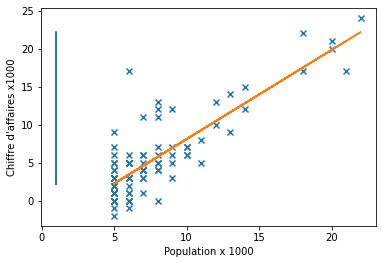

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

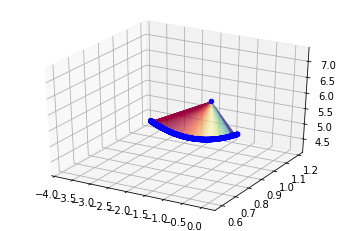

In [ ]:
A=theta_history[:,0]
B=theta_history[:,1]
Z=cost_history
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(A, B, Z, cmap=plt.cm.Spectral)
ax.scatter(A, B, Z, c='blue')
plt.show()

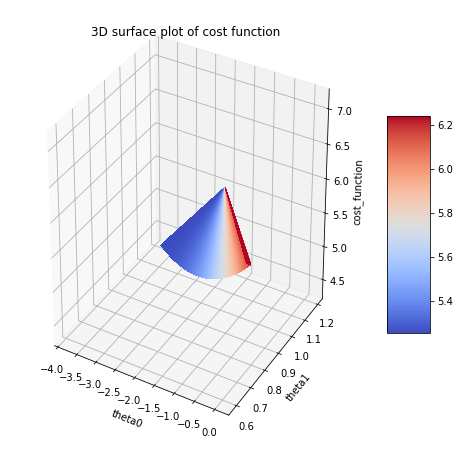

In [ ]:
A=theta_history[:,0]
B=theta_history[:,1]
C=cost_history
fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D surface plot of cost function')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost_function')
theta_history_ultime=theta_history.reshape(theta_history.shape[1],theta_history.shape[0])
x1=theta_history_ultime[0]
x2=theta_history_ultime[1]
f=cost_history
surf =  ax.plot_trisurf(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.36893081])

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.54238177])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données  
dataMulti = np.genfromtxt("/content/gdrive/My Drive/TP/TP2/dataMulti.csv", delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((dataMulti.shape[0],1)) 
X_multi=np.column_stack((intercept,dataMulti[:,0:2]))
#//numpy.column_stack() function is used to stack 1-D arrays as columns into a 2-D array
y_multi = dataMulti[:, 2]

In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire


Mise à l'échelle des données

In [ ]:
number_examples=X_multi.shape[0]
number_features=X_multi.shape[1]

X_norm=np.column_stack((intercept,dataMulti[:,0:2]))
for i in range(1, number_features):
  moy=np.mean(X_norm[:,i])
  standard_deviation = np.sqrt(X_norm[:,i])
  X_norm[:,i]=[np.subtract(X_norm[j,i], moy) / standard_deviation[j] for j in range(number_examples)]

Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

In [ ]:
%%time
theta = np.zeros((3, 1))
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta= gradientDescent(X_multi, y_multi, theta, alpha, iterations);
print(theta)

[[nan]
 [nan]
 [nan]]
CPU times: user 55.7 ms, sys: 0 ns, total: 55.7 ms
Wall time: 55.8 ms


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
%%time
"""on remarque que sans la normalisation, la descente du gradient nous donne nan , 
sauf si on diminue le nombre d'itérations  ou la valeur de alpha """
theta = np.zeros((3, 1))
# paramètres
iterations = 40;
alpha = 0.001;
# Appel
theta= gradientDescent(X_multi, y_multi, theta, alpha, iterations);
print(theta)

[[7.21147752e+139]
 [1.66558623e+143]
 [2.40565877e+140]]
CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 4.31 ms


In [ ]:
#cost
initialCost=computeCost(X_multi, y_multi, theta)
print(initialCost)

6.409542098783124e+292


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [ ]:
%%time
#avec normalisation
""" avec la normalisation, on obtient des valeurs de theta plus optimales
"""
theta = np.zeros((3, 1))
# paramètres
iterations = 1500;
#on doit changer la valeur de alpha sinon la fonction va me donner nan
alpha = 0.001;
# Appel
theta_multi= gradientDescent(X_norm, y_multi, theta, alpha, iterations);
print(theta)

[[-0.76547751]
 [ 0.00245594]
 [ 0.00682719]]
CPU times: user 56.7 ms, sys: 317 µs, total: 57 ms
Wall time: 59.1 ms


In [ ]:
#cost
initialCost=computeCost(X_norm, y_multi, theta_multi)
print(initialCost)

0.0265668620419651


In [ ]:
def predict(x1,x2):
  return theta_multi[0]*1 + theta_multi[1]*x1 + theta_multi[2]*x2

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#comparaison avec la première partie: une seule caractéristique
reg = LinearRegression()
reg.fit(X, y)
#prédiction avec le modèle de scikitlearn
reg.predict(np.array([[1, 3.5]]))

array([0.36623975])

In [ ]:
#prédiction avec notre modèle
theta=np.zeros((2,1))
theta= gradientDescent(X, y, theta, alpha, iterations=1500)
print(np.matmul([1, 3.5],theta))

[2.21102056]


In [ ]:
#comparaison avec la deuxième partie: deux caractéristiques
reg_multi = LinearRegression()
reg_multi.fit(X_norm, y_multi)
#prédiction avec le modèle de scikitlearn
reg_multi.predict(np.array([[1,2,3]]))

array([-1.])

In [ ]:
predict(2,3)

array([-0.74008406])

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
"""dans le première partie, augmenter le nombre d'itération car cela va nous permettre d'avoir des résultats 
plus proches à ceux du modèle de sklearn"""
theta=np.zeros((2,1))
theta= gradientDescent(X, y, theta, alpha, iterations=7000)
print(np.matmul([1, 3.5],theta))
"""dans la deuxième partie , on doit diminuer la valeur de alpha
(on a travaillé avec 0.001 au lieu de 0.01 sinon on va avoir la valeur nan) """

[0.99829629]


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance